In [1]:
library(ggplot2)
library(tidyverse)
library(lubridate)
library(Seurat)

library(dplyr)
library(AnnotationDbi)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, cluster

In [2]:
library(RColorBrewer)

In [3]:
filename <- "/gpfs/home/meyin/published_data/parabiosis/pb_combined.rds?download=1"
origdata <- readRDS(filename)

In [5]:
origdata <- subset(origdata, subset = Celltype != "Doublet")

In [6]:
metadata <- origdata@meta.data

In [7]:
colnames(metadata)

[1] "orig.ident"                "nCount_RNA"               
 [3] "nFeature_RNA"              "percent.mt"               
 [5] "RNA_snn_res.0.15"          "seurat_clusters"          
 [7] "RNA_snn_res.0.25"          "RNA_snn_res.0.5"          
 [9] "LMO_maxID"                 "LMO_secondID"             
[11] "LMO_margin"                "LMO_classification"       
[13] "LMO_classification.global" "hash.ID"                  
[15] "nCount_SCT"                "nFeature_SCT"             
[17] "SCT_snn_res.0.25"          "SCT_snn_res.0.2"          
[19] "Barcode"                   "Age"                      
[21] "Type"                      "Months"                   
[23] "Pair_ID"                   "Batch"                    
[25] "FACS"                      "LMO_Barcode"              
[27] "AgeCond"                   "S.Score"                  
[29] "G2M.Score"                 "Phase"                    
[31] "Celltype"                  "Experiment"               
[33] "nGene"                     "nUMI"                     
[35] "percent.mito"              "res.0.2"                  
[37] "SCT_snn_res.0.5"           "SCT_snn_res.0.6"          
[39] "SCT_snn_res.0.55"          "SCT_snn_res.0.52"         
[41] "SCT_snn_res.0.53"

In [8]:
head(metadata)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.15,seurat_clusters,RNA_snn_res.0.25,RNA_snn_res.0.5,LMO_maxID,LMO_secondID,⋯,Experiment,nGene,nUMI,percent.mito,res.0.2,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.55,SCT_snn_res.0.52,SCT_snn_res.0.53
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
20_AAACCCATCGGTAGGA-1_1,GEX1,5461,2259,3.918696,3,3,3,3,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,⋯,2020,NA,NA,NA,NA,1,2,1,1,3
20_AAACGAACAACCAACT-1_1,GEX1,7542,2698,4.627420,1,7,4,4,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,2020,NA,NA,NA,NA,5,5,5,4,7
20_AAACGAACAGGTTCAT-1_1,GEX1,15424,3461,3.060166,0,8,7,8,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,2020,NA,NA,NA,NA,0,7,0,0,8
20_AAACGAACATGGAACG-1_1,GEX1,11212,3462,4.584374,5,6,4,6,BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC,BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC,⋯,2020,NA,NA,NA,NA,7,8,7,4,6
20_AAACGAAGTTGCGGCT-1_1,GEX1,10125,3303,3.348148,4,9,5,5,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC,⋯,2020,NA,NA,NA,NA,8,10,8,7,9
20_AAACGAATCGTTCATT-1_1,GEX1,7902,2773,3.809162,3,3,3,3,BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG,BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG,⋯,2020,NA,NA,NA,NA,1,2,1,1,3


In [34]:
custom_colors <- c("Microglia" = "#F8766D",
                   "Oligodendro" = "#E76BF3",
                   "Astrocyte_qNSC" = "#00B0F6",
                   "Mural" = "#FF9F00",
                   "Endothelial" = "#A3A500",
                   "aNSC_NPC" = "#619CFF",
                   "Ependymal" = "#F564E3",
                   "Macrophage" = "#7CAE00",
                   "OPC" = "#00C8FF",
                   "Neuronal" = "#8B00F5",
                   "T_Cell" = "#00BA38",
                   "Vascular_Leptomeningeal" = "#00C08B",
                   "Epithelial" = "#FF61C3",
                   "Neuroblast" = "#00BF7D")


In [12]:
umap_plot <- DimPlot(origdata, reduction = "umap_har", group.by = "Celltype")

ggsave(filename = "figures/umap/umap_plot_lowres_celltype.png", plot = umap_plot, width = 10, height = 7, units = "in")


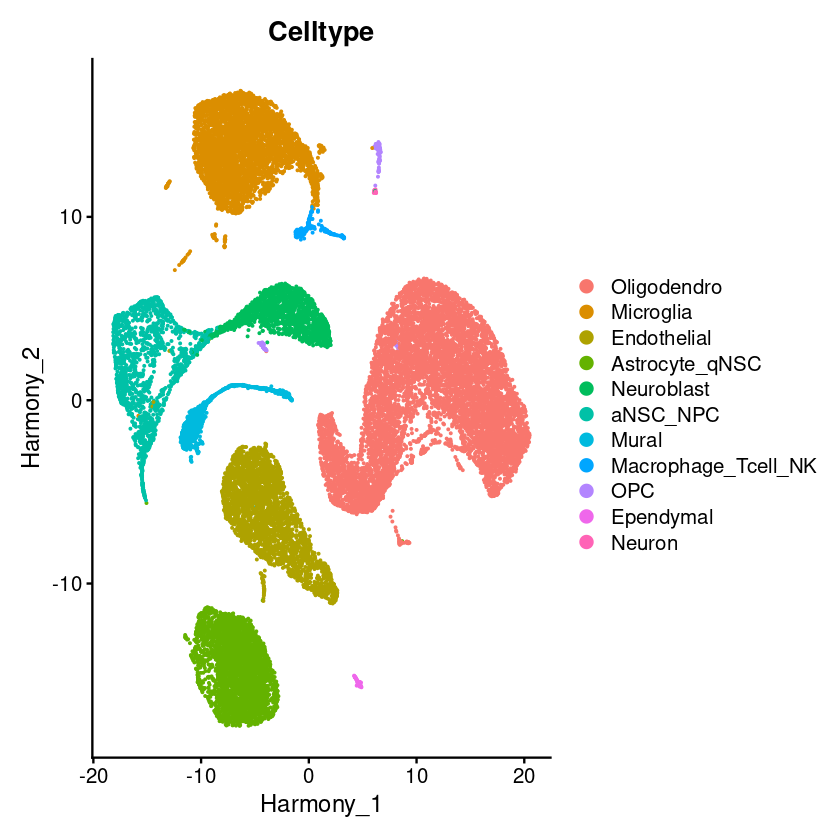

In [13]:
umap_plot